<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Build vocab

In [1]:
#| echo: false
#| output: asis
show_doc(Vocab)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/models/lm.py#L26){target="_blank" style="float:right; font-size:smaller"}

### Vocab

>      Vocab (data:List[List[str]], specials=['<pad>', '<unk>', '<bos>',
>             '<eos>'])

Initialize self.  See help(type(self)) for accurate signature.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data | typing.List[typing.List[str]] |  | one line per sentence. each line is a list of tokens |
| specials | list | ['<pad>', '<unk>', '<bos>', '<eos>'] | special characters |

### Usage

In [ ]:
# reading with pandas
df = pd.read_csv('../data/names.txt', header=None, names=['name'])
data = list(df.name)

# reading directly in plain python
with open('../data/names.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

# add special tokens
data = [['<bos>'] +list(line.strip()) + ['<eos>'] for line in lines]
print(data[:3])

v = Vocab(data)
print(v.stoi('e'))
print(v.itos(8))
print(v.stoi('<pad>'))
print(v.stoi(['e','m']))
print(v.itos([8,17]))
print(len(v))
print(''.join(v.vocabulary))

[['<bos>', 'e', 'm', 'm', 'a', '<eos>'], ['<bos>', 'o', 'l', 'i', 'v', 'i', 'a', '<eos>'], ['<bos>', 'a', 'v', 'a', '<eos>']]
8
e
0
[8, 17]
['e', 'm']
32
<<bos><eos><pad><unk>>abcdefghijklmnopqrstuvwxyz


In [ ]:
print(data)

[['<bos>', 'e', 'm', 'm', 'a', '<eos>'], ['<bos>', 'o', 'l', 'i', 'v', 'i', 'a', '<eos>'], ['<bos>', 'a', 'v', 'a', '<eos>'], ['<bos>', 'i', 's', 'a', 'b', 'e', 'l', 'l', 'a', '<eos>'], ['<bos>', 's', 'o', 'p', 'h', 'i', 'a', '<eos>'], ['<bos>', 'c', 'h', 'a', 'r', 'l', 'o', 't', 't', 'e', '<eos>'], ['<bos>', 'm', 'i', 'a', '<eos>'], ['<bos>', 'a', 'm', 'e', 'l', 'i', 'a', '<eos>'], ['<bos>', 'h', 'a', 'r', 'p', 'e', 'r', '<eos>'], ['<bos>', 'e', 'v', 'e', 'l', 'y', 'n', '<eos>'], ['<bos>', 'a', 'b', 'i', 'g', 'a', 'i', 'l', '<eos>'], ['<bos>', 'e', 'm', 'i', 'l', 'y', '<eos>'], ['<bos>', 'e', 'l', 'i', 'z', 'a', 'b', 'e', 't', 'h', '<eos>'], ['<bos>', 'm', 'i', 'l', 'a', '<eos>'], ['<bos>', 'e', 'l', 'l', 'a', '<eos>'], ['<bos>', 'a', 'v', 'e', 'r', 'y', '<eos>'], ['<bos>', 's', 'o', 'f', 'i', 'a', '<eos>'], ['<bos>', 'c', 'a', 'm', 'i', 'l', 'a', '<eos>'], ['<bos>', 'a', 'r', 'i', 'a', '<eos>'], ['<bos>', 's', 'c', 'a', 'r', 'l', 'e', 't', 't', '<eos>'], ['<bos>', 'v', 'i', 'c', 't',

In [ ]:
names = list(df.name)
print(len(names), names)

32033 ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton',

## Data formatting
given last n tokens we predict token n+1

In [ ]:
s = list("alexandra")
print(s)
bigram = [(x,y) for x, y in zip(s, s[1:])]
print(bigram)
trigram = [ (x,y,z) for x, y, z in zip(s, s[1:], s[2:])]

['a', 'l', 'e', 'x', 'a', 'n', 'd', 'r', 'a']
[('a', 'l'), ('l', 'e'), ('e', 'x'), ('x', 'a'), ('a', 'n'), ('n', 'd'), ('d', 'r'), ('r', 'a')]


In [ ]:
def make_dataset(names:List[str], verbose:bool=False, pad_value=0, context_length=3):
    X = []
    y = []
    for name in names:
        s = list(name)
        if verbose:
            print(s)
        # init prefix with padding while len < context_length
        for i in range(context_length-1):
            sequence = v.stoi(s[:i+1])
            pad_len = context_length - len(sequence)
            pad = [pad_value] * pad_len
            X.append(pad + sequence)
            y.append(v.stoi(s[i+1]))
            if verbose:
                print(pad+s[:i+1], s[i+1])

        # for length seq = context_length
        i = 0
        while i < (len(s) - context_length):
            X.append(v.stoi(s[i:context_length+i]))
            y.append(v.stoi(s[i+context_length]))
            if verbose:
                print(s[i:context_length+i], s[i+context_length])
            i += 1
    return torch.tensor(X),torch.tensor(y)

In [ ]:
X, y = make_dataset(data[:10], verbose=True, pad_value=v.stoi('<pad>'))
print(X.shape, y.shape)

['<bos>', 'e', 'm', 'm', 'a', '<eos>']
[0, 0, '<bos>'] e
[0, '<bos>', 'e'] m
['<bos>', 'e', 'm'] m
['e', 'm', 'm'] a
['m', 'm', 'a'] <eos>
['<bos>', 'o', 'l', 'i', 'v', 'i', 'a', '<eos>']
[0, 0, '<bos>'] o
[0, '<bos>', 'o'] l
['<bos>', 'o', 'l'] i
['o', 'l', 'i'] v
['l', 'i', 'v'] i
['i', 'v', 'i'] a
['v', 'i', 'a'] <eos>
['<bos>', 'a', 'v', 'a', '<eos>']
[0, 0, '<bos>'] a
[0, '<bos>', 'a'] v
['<bos>', 'a', 'v'] a
['a', 'v', 'a'] <eos>
['<bos>', 'i', 's', 'a', 'b', 'e', 'l', 'l', 'a', '<eos>']
[0, 0, '<bos>'] i
[0, '<bos>', 'i'] s
['<bos>', 'i', 's'] a
['i', 's', 'a'] b
['s', 'a', 'b'] e
['a', 'b', 'e'] l
['b', 'e', 'l'] l
['e', 'l', 'l'] a
['l', 'l', 'a'] <eos>
['<bos>', 's', 'o', 'p', 'h', 'i', 'a', '<eos>']
[0, 0, '<bos>'] s
[0, '<bos>', 's'] o
['<bos>', 's', 'o'] p
['s', 'o', 'p'] h
['o', 'p', 'h'] i
['p', 'h', 'i'] a
['h', 'i', 'a'] <eos>
['<bos>', 'c', 'h', 'a', 'r', 'l', 'o', 't', 't', 'e', '<eos>']
[0, 0, '<bos>'] c
[0, '<bos>', 'c'] h
['<bos>', 'c', 'h'] a
['c', 'h', 'a'] r
['

## MLP Model
https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [ ]:
# F.one_hot(torch.tensor(5), num_classes=n_vocab).float()@C # == C[5]

In [2]:
#| echo: false
#| output: asis
show_doc(NNLM)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/models/lm.py#L86){target="_blank" style="float:right; font-size:smaller"}

### NNLM

>      NNLM (n_vocab:int, n_emb:int, n_context:int, n_h:int)

Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call to the parent class
    must be made before assignment on the child.

:ivar training: Boolean represents whether this module is in training or
                evaluation mode.
:vartype training: bool

In [3]:
#| echo: false
#| output: asis
show_doc(NNLMConfig)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/models/lm.py#L79){target="_blank" style="float:right; font-size:smaller"}

### NNLMConfig

>      NNLMConfig (n_vocab:int=30, n_emb:int=10, n_context:int=3, n_h:int=100)

### Usage

In [ ]:
conf = NNLMConfig(n_vocab=len(v))
lm = NNLM(**asdict(conf))
n_samples = 25
x = torch.randint(conf.n_vocab, (n_samples, conf.n_context))
print(x.shape)
y = lm(x)
print(y.shape)

torch.Size([25, 3])
torch.Size([25, 32])


### Basic training loop

In [ ]:
n1 = int(0.8*len(data))
n2 = int(0.9*len(data))
Xtr, Ytr = make_dataset(data[:80])
Xdev, Ydev = make_dataset(data[80:90])
Xte, Yte = make_dataset(data[90:100])

In [ ]:
# overfit one batch
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
optim = SGD(lm.parameters(), lr=0.01, momentum=0.9)
train_loss = []
for _ in range(2000):
    optim.zero_grad()
    logits = lm(Xtr)
    loss = F.cross_entropy(logits, Ytr)
    loss.backward()
    optim.step()
    train_loss.append(loss.item())

[<matplotlib.lines.Line2D>]

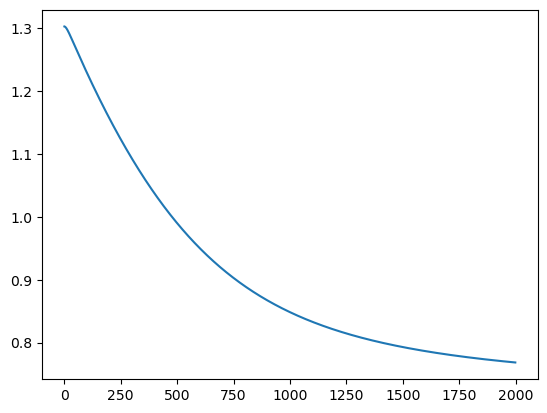

In [ ]:
plt.plot(train_loss)

### Sample

In [ ]:
eos = v.stoi('<eos>')
bos = v.stoi('<bos>')
pad = v.stoi('<pad>')
sequences = lm.sample(n_iterations=50,bos=bos, eos=eos, pad=pad)
for seq in sequences:
    print(''.join(v.itos(i) for i in seq))

annah
gabriella
addison
zoey
penety
groline
addison
abtison
elena
adelian
iava
sarah
genelope
claisley
eleanora
harna
oline
ariella
skylar
evelyn
lucy
nova
bella
ella
madison
paia
cora
serebrooklyn
maria
mila
avlison
evely
skyla
kiora
zoe
savan
oline
la
paisley
amel
laylarelizanna
luna
lubanna
emma
harper
eline
madelyn
zoey
leanor
addis
